# Loading Drug-Target Interaction Datasets

This notebook covers:
- Loading the Davis, KIBA, BindingDB, Metz datasets
- Merging them into a single dataframe
- Filtering based on molecular properties
- Visualizing distributions, overlaps, and statistics
- Saving the merged dataset as a csv file

Unique drug-target interaction pairs: 464.583
- Unique drugs: 162.880
- Unique targets: 2.705
- Ratio observed: 1.05%

In [1]:
import os

# Set the working directory to the root of the project
os.chdir("/home/robsyc/Desktop/thesis/MB-VAE-DTI")

In [2]:
# Import the necessary functions from the loading module
from mb_vae_dti.loading import (
    load_or_create_merged_dataset,
    get_dataset_stats,
    plot_interaction_distribution,
    plot_dataset_statistics,
    plot_dataset_overlap
)

14:55:04 - INFO - Old pandas version detected. Patching DataFrame.map to DataFrame.applymap


## Load, merge and filter the datasets


In [3]:
# Load the merged dataset & apply filters
df = load_or_create_merged_dataset(
    dataset_names=["DAVIS", "KIBA", "BindingDB_Kd", "BindingDB_Ki", "Metz"], 
    force_reload=True,
    apply_filters=True,
    verbose=True
)

Found local copy...
Loading...
Done!
To log space...
The original data has been updated!
Found local copy...
Loading...


Creating merged dataset from: DAVIS, KIBA, BindingDB_Kd, BindingDB_Ki, Metz
Loading DAVIS dataset...
Loaded DAVIS dataset with 25772 interactions


Loading KIBA dataset...


Done!
Found local copy...
Loading...
Done!
To log space...


Loaded KIBA dataset with 117657 interactions


Loading BindingDB_Kd dataset...


The original data has been updated!


Found duplicate drug-target pairs in BindingDB_Kd. Keeping pairs with highest affinity.


Found local copy...
Loading...


Loaded BindingDB_Kd dataset with 42229 interactions


Loading BindingDB_Ki dataset...


Done!
To log space...
The original data has been updated!


Found duplicate drug-target pairs in BindingDB_Ki. Keeping pairs with highest affinity.
Loaded BindingDB_Ki dataset with 296667 interactions


Loading Metz dataset...
Loaded Metz dataset with 35259 interactions


Merged dataset contains 501068 unique drug-target pairs
Filtering dataset with 501068 rows...
  - Max heavy atoms: 64
  - Max protein sequence length: 1280
Computing heavy atom counts for 171905 molecules...
Computed heavy atom counts for 171905 molecules
Filtering complete. Rows reduced from 501068 to 464583
Saved dataset to data/processed/merged_BindingDB_Kd_BindingDB_Ki_DAVIS_KIBA_Metz_filtered.csv


In [4]:
# Get statistics of the merged dataset
get_dataset_stats(df)

{'n_interactions': 464583,
 'n_unique_drugs': 162880,
 'n_unique_targets': 2705,
 'avg_drug_smiles_length': 52.27712378627716,
 'avg_target_aa_length': 541.3403891231492,
 'Y_pKd_mean': 5.687022318217582,
 'Y_pKd_std': 1.2010130718830354,
 'Y_pKd_min': 1.999999995657055,
 'Y_pKd_max': 10.0,
 'Y_KIBA_mean': 11.70627341827158,
 'Y_KIBA_std': 0.82103579237372,
 'Y_KIBA_min': 0.0,
 'Y_KIBA_max': 17.196910013,
 'Y_pKi_mean': 6.705946891213439,
 'Y_pKi_std': 1.473276509202314,
 'Y_pKi_min': 1.999999995657055,
 'Y_pKi_max': 10.1,
 'in_DAVIS_count': 23188,
 'in_DAVIS_percentage': 4.991142594541772,
 'in_KIBA_count': 105361,
 'in_KIBA_percentage': 22.678617168514563,
 'in_BindingDB_Kd_count': 37010,
 'in_BindingDB_Kd_percentage': 7.966283742625106,
 'in_BindingDB_Ki_count': 283081,
 'in_BindingDB_Ki_percentage': 60.93227690208208,
 'in_Metz_count': 30689,
 'in_Metz_percentage': 6.6057087753964305}

## Visualize the merged dataset

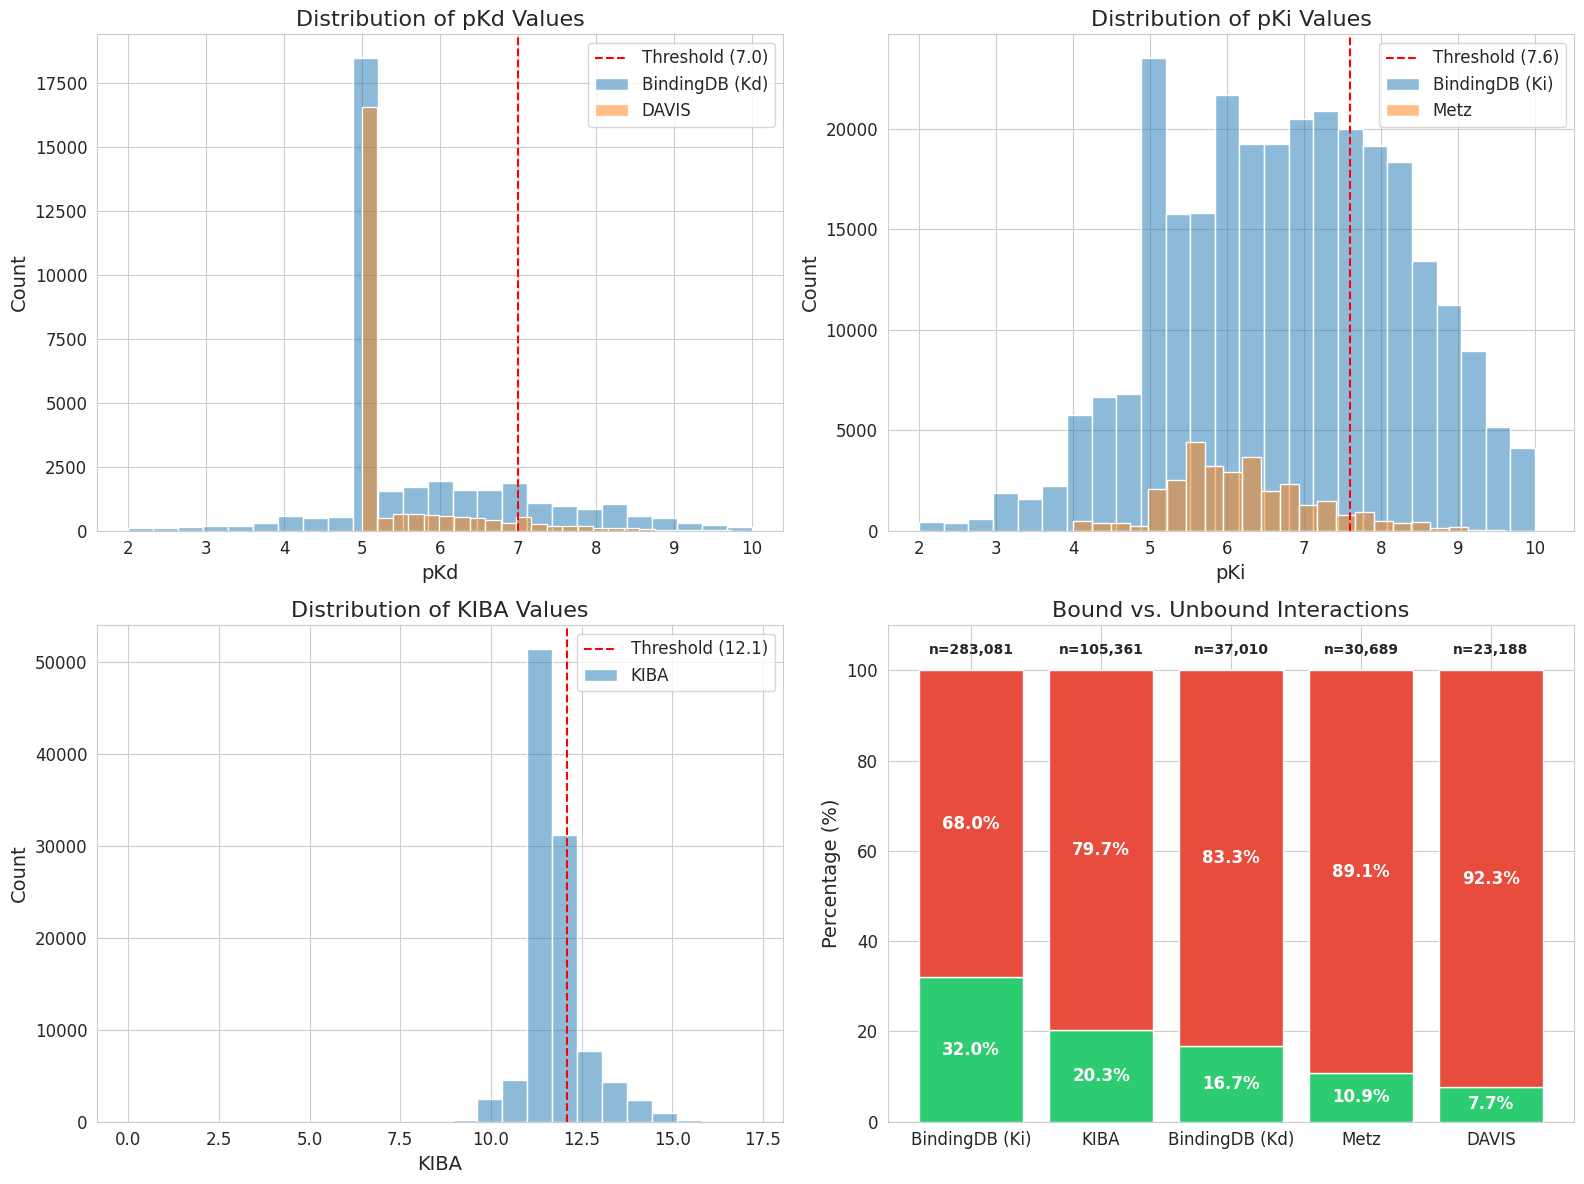

In [5]:
df_Davis = df[df['in_DAVIS'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
df_BDBKd = df[df['in_BindingDB_Kd'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
df_BDBKi = df[df['in_BindingDB_Ki'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
df_Metz = df[df['in_Metz'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
df_KIBA = df[df['in_KIBA'] == True].drop(columns = ['Y_pKd', 'Y_pKi'])

plot_path = plot_interaction_distribution(
    [df_BDBKd, df_Davis, df_BDBKi, df_Metz, df_KIBA],
    ["BindingDB (Kd)", "DAVIS", "BindingDB (Ki)", "Metz", "KIBA"],
    save_path="data/images/interaction_distribution.png"
)

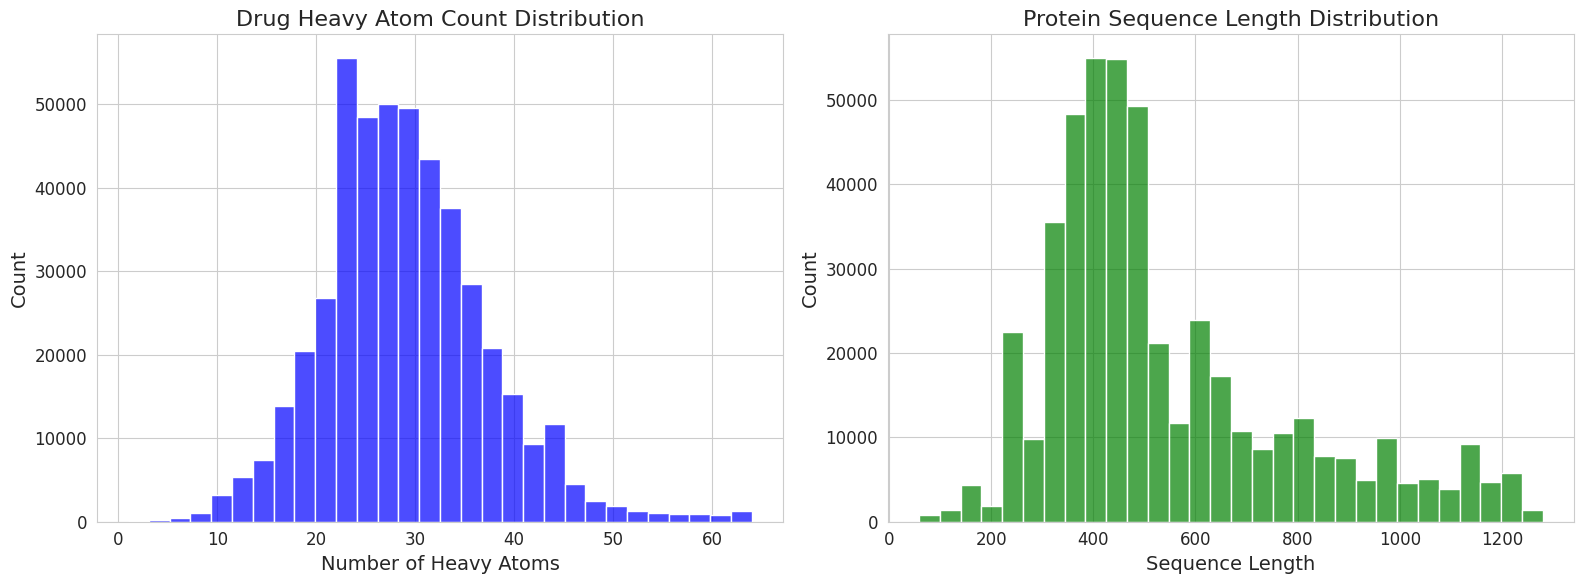

In [6]:
plot_path = plot_dataset_statistics(df)

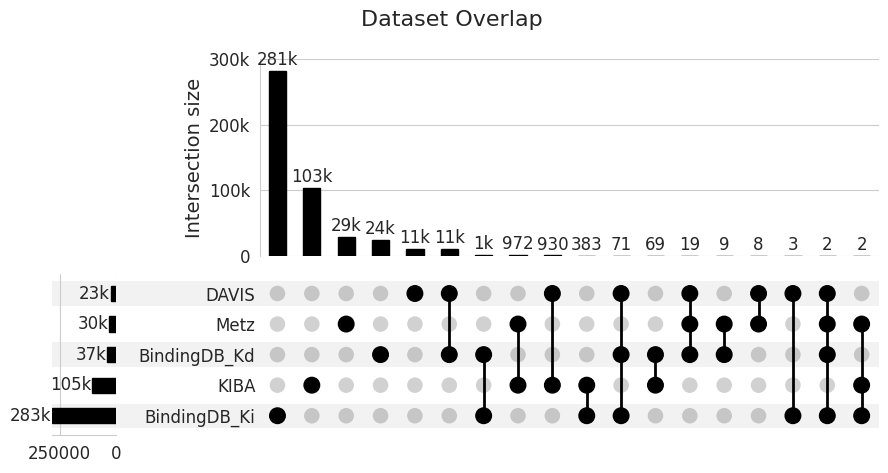

In [7]:
path = plot_dataset_overlap(df)

In [8]:
df

,Drug_SMILES,Target_AA,Y,Y_pKd,Y_KIBA,Y_pKi,in_DAVIS,in_KIBA,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz
0,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,False,4.999996,NaN,NaN,True,False,True,False,False
1,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,True,8.920819,NaN,NaN,True,False,False,False,False
2,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,True,7.995679,NaN,NaN,True,False,False,False,False
3,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,False,4.999996,NaN,NaN,True,False,True,False,False
4,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,False,4.999996,NaN,NaN,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
501063,CN(c1ncccc1CNc2nc(Nc3ccc4NC(=O)Cc4c3)ncc2C(F)(...,MSLHFLYYCSEPTLDVKIAFCQGFDKQVDVSYIAKHYNMSKSKVDN...,False,NaN,NaN,6.6,False,False,False,False,True
501064,CN(c1ncccc1CNc2nc(Nc3ccc4NC(=O)Cc4c3)ncc2C(F)(...,LGGRSSCEDPGCPRDEERAPRMGCMKSKFLQVGGNTFSKTETSASP...,False,NaN,NaN,5.5,False,False,False,False,True
501065,CN(c1ncccc1CNc2nc(Nc3ccc4NC(=O)Cc4c3)ncc2C(F)(...,MSSRTVLAPGNDRNSDTHGTLGSGRSSDKGPSWSSRSLGARCRNSI...,False,NaN,NaN,7.3,False,False,False,False,True
501066,CN(c1ncccc1CNc2nc(Nc3ccc4NC(=O)Cc4c3)ncc2C(F)(...,MVMADGPRHLQRGPVRVGFYDIEGTLGKGNFAVVKLGRHRITKTEV...,False,NaN,NaN,6.7,False,False,False,False,True
